In [1]:
import sklearn
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

### PCA by eigendecomposition

In [9]:
# subtract feature means
scaler = StandardScaler(with_std=False)
X_hat = scaler.fit_transform(X)

# compute covariance matrix
X_cov = X_hat.T @ X_hat

# compute eig decomp of cov matrix (may not be sorted)
eigvals, eigvecs = np.linalg.eig(X_cov)

# sort eigvals, select k components
n_comp = 2
sorted_eigvals = np.argsort(eigvals)[::-1]

# compute coordinates in new space
X_new = X @ eigvecs[:, sorted_eigvals[:n_comp]]

### PCA by SVD

In [7]:
# subtract feature means
scaler = StandardScaler(with_std=False)
X_hat = scaler.fit_transform(X)

# compute svd
U, S, Wh = np.linalg.svd(X_hat)

# right singular matrix's columns are eigvecs (sorted)
W = Wh.T

# compute coordinates in new space
n_comp = 2
X_new = X @ W[:,:n_comp]

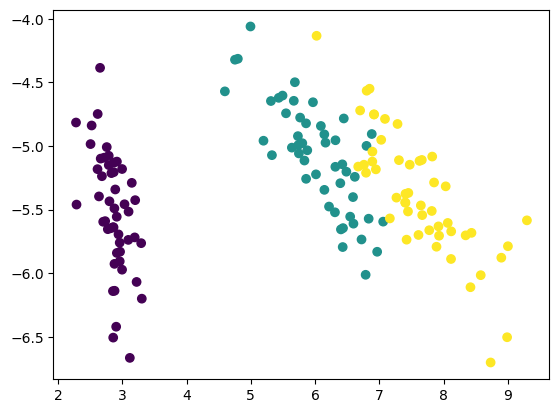

In [10]:
plt.scatter(x=X_new[:,0],y=X_new[:,1],c=y)

### validate above by sklearn's implementation

In [11]:
pca = PCA(n_components=2, svd_solver='full')

X_sk = pca.fit_transform(X)

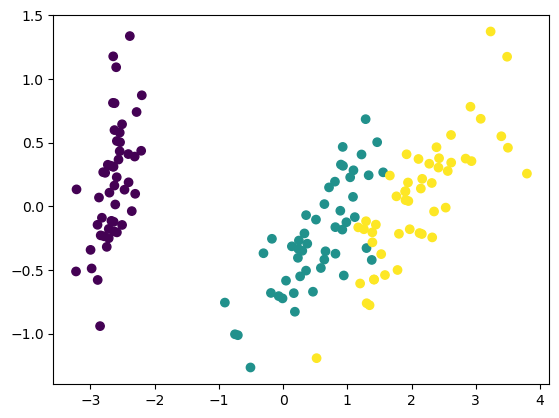

In [12]:
plt.scatter(x=X_sk[:,0],y=X_sk[:,1],c=y)